### Problem Statement- Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries

In [2]:
#import all libraries- 
#numpy for numerical operations 
#pandas for dataframe operations 
#matplotlib and seaborn for data visualisation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# read the netflix comma seperated file and create dataframe

df=pd.read_csv("netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

In [4]:
#gives the shape of dataframe
df.shape 

(8807, 12)

In [5]:
#gives bird eye view of complete dataframe.

df.info() 

#Most of the cols are object type, no continuos values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
show_id         8807 non-null object
type            8807 non-null object
title           8807 non-null object
director        6173 non-null object
cast            7982 non-null object
country         7976 non-null object
date_added      8797 non-null object
release_year    8807 non-null int64
rating          8803 non-null object
duration        8804 non-null object
listed_in       8807 non-null object
description     8807 non-null object
dtypes: int64(1), object(11)
memory usage: 825.7+ KB


In [6]:
#check missing values

df.isnull().sum()

# director,cast,country have lots of missing values which needs to be tackled.
#date_added,rating,duration has few missing values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
#describes statistical summary of dataframe.
#count of no. of records,mean of continuous values,std,
#min continuous value, max continuous value etc

df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### Non-Graphical Analysis: Value counts and unique attributes

In [8]:
#number of unique values in each column

df.nunique().to_frame()

#most of the categorical values have many categories in it except type and rating

,0
show_id,8807
type,2
title,8807
director,4528
cast,7692
country,748
date_added,1767
release_year,74
rating,17
duration,220


# Univariate Analysis

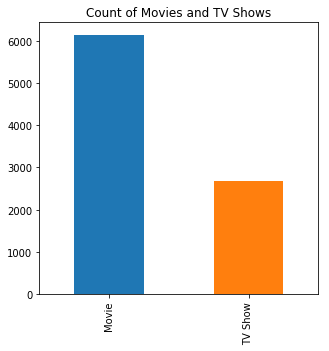

In [9]:
# Two types of shows are on Netflix...Movies and Tv shows
# Movies are released much more than TV shows
df["type"].value_counts()[0:20,].plot(kind="bar",figsize=(5,5),title="Count of Movies and TV Shows")

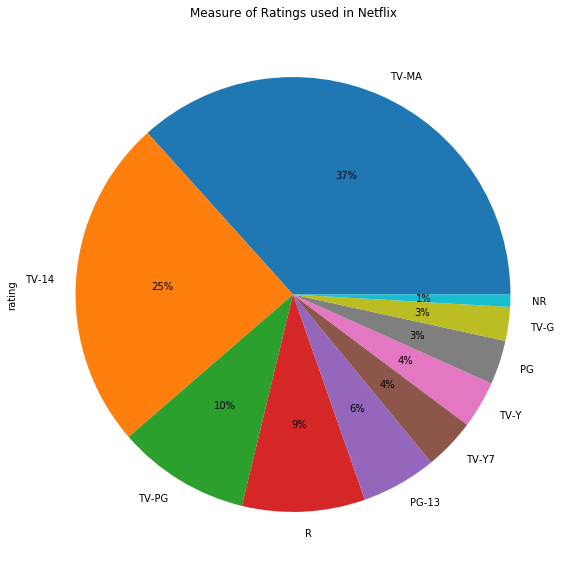

In [9]:
# Different category of ratings with their counts..
# TV-MA is the most common rating
df['rating'].value_counts()[0:10,].plot(kind="pie",figsize=(10,10),title="Measure of Ratings used in Netflix",autopct='%1.0f%%')

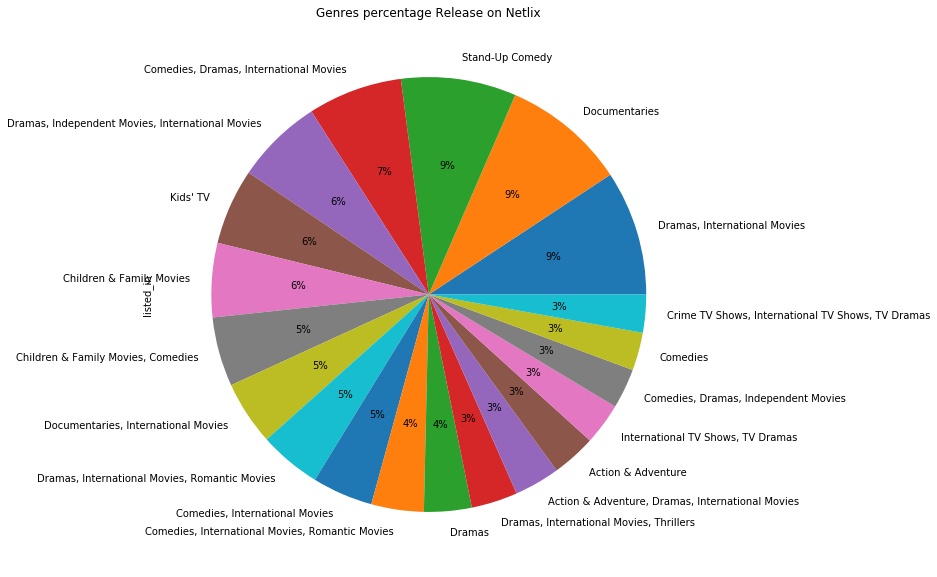

In [10]:
#different genres movies released
df["listed_in"].value_counts()[0:20,].plot(kind="pie",figsize=(10,10),title="Genres percentage Release on Netlix",autopct='%1.0f%%')

#Dramas, International Movie, Documentries,Stand-Up Comedy are most common genres on Netflix

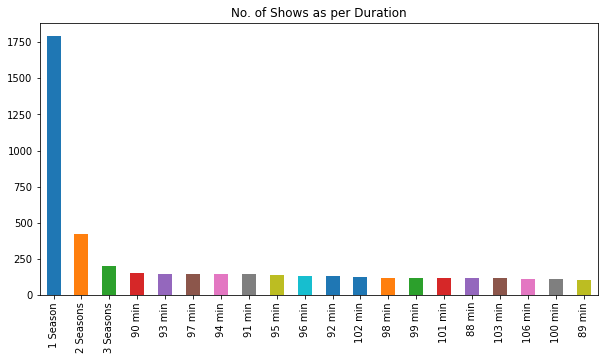

In [11]:
# Many number of shows are having seasons..
# 3 hours of movie is the common time range
df["duration"].value_counts()[0:20,].plot(kind="bar",figsize=(10,5),title="No. of Shows as per Duration")

#season based release is most common

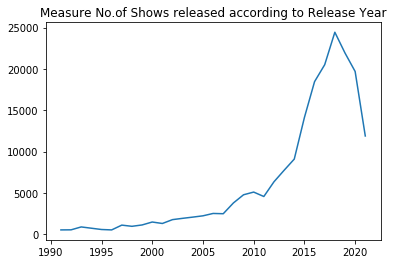

In [22]:

#After 2015 Netflix start releasing many shows.
df["release_year"].value_counts()[0:30,].sort_index(ascending=False).plot(kind="line",title="Measure No.of Shows released according to Release Year")

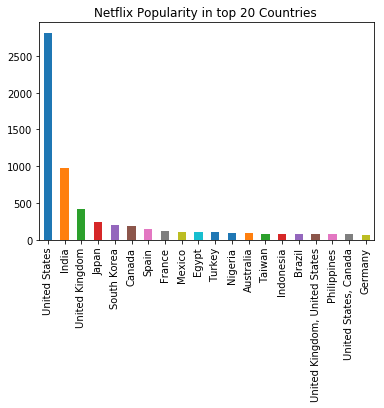

In [13]:
#will give count of countries where netflix is most popular

df['country'].value_counts()[0:20,].plot(kind="bar",title="Netflix Popularity in top 20 Countries ")

#Netflix is more popular in US and India

In [ ]:
# Many features are nested so we cannot do any processing, first unnest them.(cast, country, director, listed_in)
# Data Preprocessing

In [10]:
#Unnesting cast feature
casting=df["cast"].apply(lambda x:str(x).split(",")).tolist()
df_cast=pd.DataFrame(casting,index=df["title"])
df_cast=df_cast.stack()
df_cast=pd.DataFrame(df_cast)

In [11]:
#Unnesting director feature
director=df["director"].apply(lambda x:str(x).split(",")).tolist()
df_dir=pd.DataFrame(director,index=df["title"])
df_dir=df_dir.stack()
df_dir=pd.DataFrame(df_dir)


In [12]:
#Unnesting listed_in(genre) feature
listed_in=df["listed_in"].apply(lambda x:str(x).split(",")).tolist()
df_list=pd.DataFrame(listed_in,index=df["title"])
df_list=df_list.stack()
df_list=pd.DataFrame(df_list)


In [13]:
#Unnesting country feature
country=df["country"].apply(lambda x:str(x).split(",")).tolist()
df_coun=pd.DataFrame(country,index=df["title"])
df_coun=df_coun.stack()
df_coun=pd.DataFrame(df_coun)


In [14]:
#merging each dataframe to get final one
df_cast_dir=df_cast.merge(df_dir,on="title",how="inner",suffixes=('cast',"dir"))
df_cast_dir_coun=df_cast_dir.merge(df_coun,on="title",how="inner")
df_part1=df_cast_dir_coun.merge(df_list,on="title",how="inner",suffixes=('',"list"))
df_part2=df. iloc[:, [0,1,2,6,7,8,9,11]]
df=df_part1.merge(df_part2,on="title",how="inner")

# rename the columns after merging as bydefault columns becomes 0_x,0_y and so on.

df. rename(columns = {'0cast':'cast', '0dir':'director',"0":"country","0list":"listed_in"}, inplace = True) 
df.head()

,title,cast,director,country,listed_in,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,nan,Kirsten Johnson,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Ama Qamata,nan,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Ama Qamata,nan,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Ama Qamata,nan,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Khosi Ngema,nan,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


In [15]:
df[df.duplicated()]
#these rows are dulicated, we can remove them and can keep only first row of duplicates

,title,cast,director,country,listed_in,show_id,type,date_added,release_year,rating,duration,description
39354,Rust Creek,Micah Hauptman,Jen McGowan,United States,Thrillers,s1632,Movie,"November 30, 2020",2018,R,108 min,A wrong turn in the woods becomes a fight for ...
135656,300 Miles to Heaven,Adrianna Biedrzyńska,Maciej Dejczer,Denmark,Dramas,s6014,Movie,"October 1, 2019",1989,TV-14,93 min,"Hoping to help their dissident parents, two br..."
135657,300 Miles to Heaven,Adrianna Biedrzyńska,Maciej Dejczer,Denmark,International Movies,s6014,Movie,"October 1, 2019",1989,TV-14,93 min,"Hoping to help their dissident parents, two br..."
135658,300 Miles to Heaven,Adrianna Biedrzyńska,Maciej Dejczer,France,Dramas,s6014,Movie,"October 1, 2019",1989,TV-14,93 min,"Hoping to help their dissident parents, two br..."
135659,300 Miles to Heaven,Adrianna Biedrzyńska,Maciej Dejczer,France,International Movies,s6014,Movie,"October 1, 2019",1989,TV-14,93 min,"Hoping to help their dissident parents, two br..."
135660,300 Miles to Heaven,Adrianna Biedrzyńska,Maciej Dejczer,Poland,Dramas,s6014,Movie,"October 1, 2019",1989,TV-14,93 min,"Hoping to help their dissident parents, two br..."
135661,300 Miles to Heaven,Adrianna Biedrzyńska,Maciej Dejczer,Poland,International Movies,s6014,Movie,"October 1, 2019",1989,TV-14,93 min,"Hoping to help their dissident parents, two br..."


In [16]:
#drop description col as t would not help me in any analysis
df=df.drop(["description"], axis=1)

In [17]:
#remove min string in duration
#strip will remove "min"
df["duration"]=df["duration"].apply(lambda x:str(x).strip(" min"))

In [19]:
df["date_added"]=pd.to_datetime(df['date_added'])

### Visual Analysis - Univariate, Bivariate after pre-processing of the data

In [24]:
#Columns holding categorical data- Data columns (total 12 columns): under which except release date ,every column is caegorical.

C:\Users\pinki\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:3764: FutureWarning: In the future, NAT != NAT will be True rather than False.
  inc = np.r_[1, val[1:] != val[:-1]]


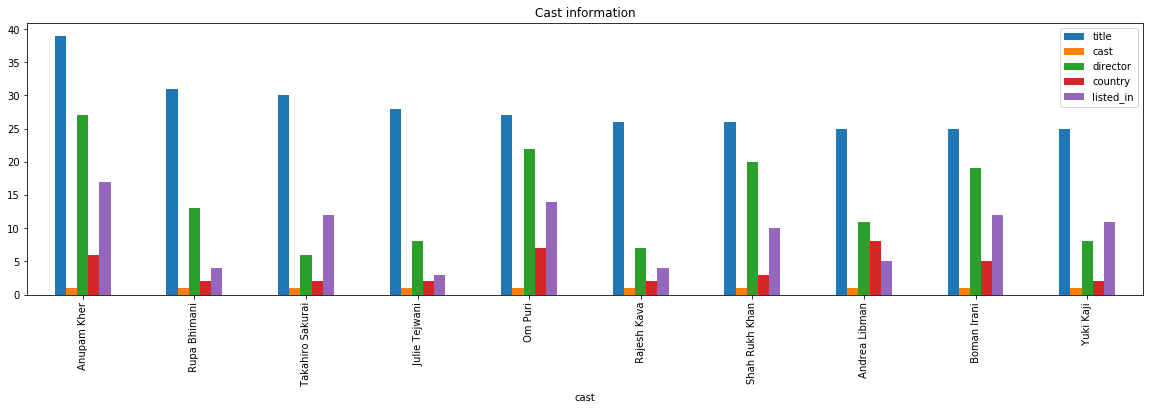

In [25]:
df.groupby("cast").nunique().sort_values(by="title",ascending=False).iloc[1:11,[0,1,2,3,4]].plot(kind="bar",figsize=(20,5),title="Cast information")
# It gives Overall Information of  top 10 Cast like how many directors they have worked with, Number of movies they acted in ans so on.

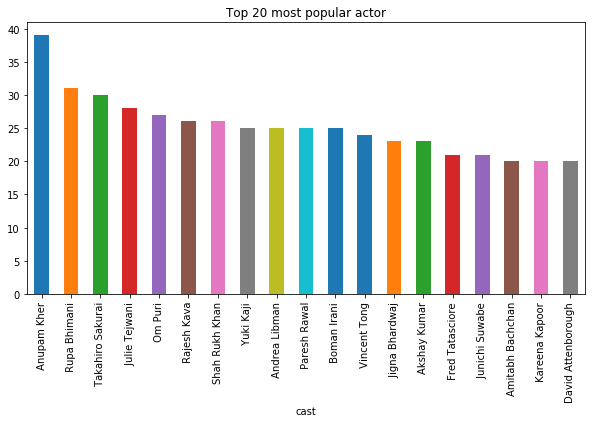

In [26]:
#Analysis on cast feature

df.groupby("cast")["title"].nunique().sort_values(ascending=False)[1:20,].plot(kind="bar",title="Top 20 most popular actor",figsize=(10,5))
#Anupam kher is the most popular actor on Netflix

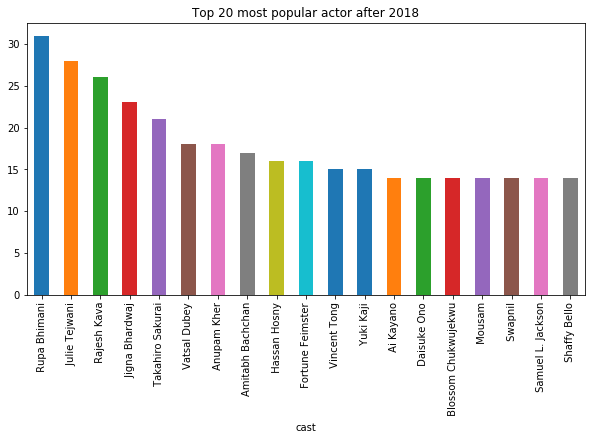

In [73]:
df.loc[(df["date_added"].dt.year >2018),["cast","listed_in","title"]].groupby(by="cast").nunique()["title"].sort_values(ascending=False)[1:20,].plot(kind="bar",title="Top 20 most popular actor after 2018",figsize=(10,5))
# Rupa Bhimani and Julie Tejwani are two top actor after 2018

In [82]:
df.loc[(df["cast"]=="Anupam Kher"),["listed_in"]]
#Anupam kher do INternational movies maximum

,listed_in
61384,Dramas
61385,International Movies
136900,Action & Adventure
136901,Dramas
136902,International Movies
163856,Comedies
163857,Dramas
163858,International Movies
201077,Dramas
201078,Independent Movies


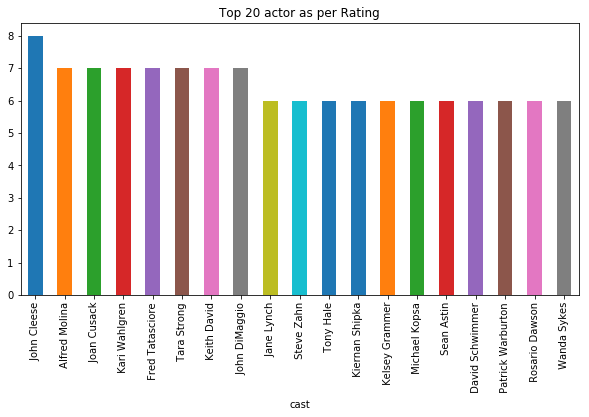

In [94]:
df.groupby("cast")["rating"].nunique().sort_values(ascending=False)[1:20,].plot(kind="bar",title="Top 20 actor as per Rating",figsize=(10,5))
#Top rated actor is John Cleese

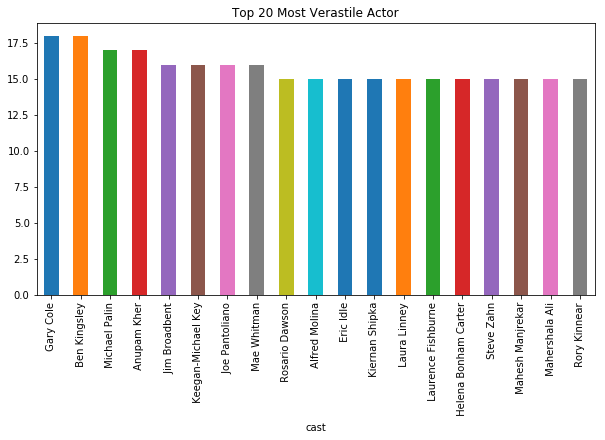

In [28]:
df.groupby("cast")["listed_in"].nunique().sort_values(ascending=False)[1:20,].plot(kind="bar",title="Top 20 Most Verastile Actor",figsize=(10,5))
#Gary cole and Ben Kingsley are most versatile actor

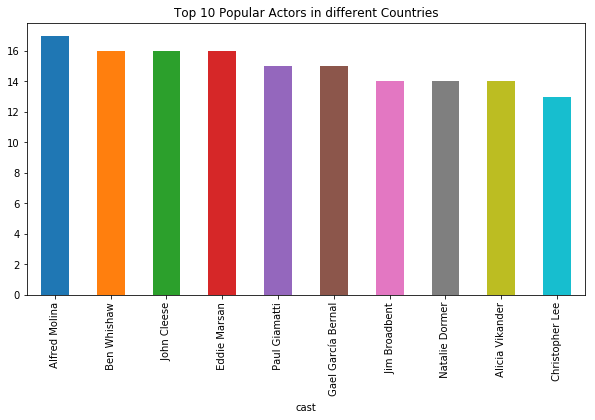

In [29]:
df.groupby("cast")["country"].nunique().sort_values(ascending=False)[1:11,].plot(kind="bar",title="Top 10 Popular Actors in different Countries",figsize=(10,5))
#Alfred Molina did movie in Different countries(Most Popular wrt to countries)

In [ ]:
#Analysis on director feature

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000013E4BEF0>,
      dtype=object)

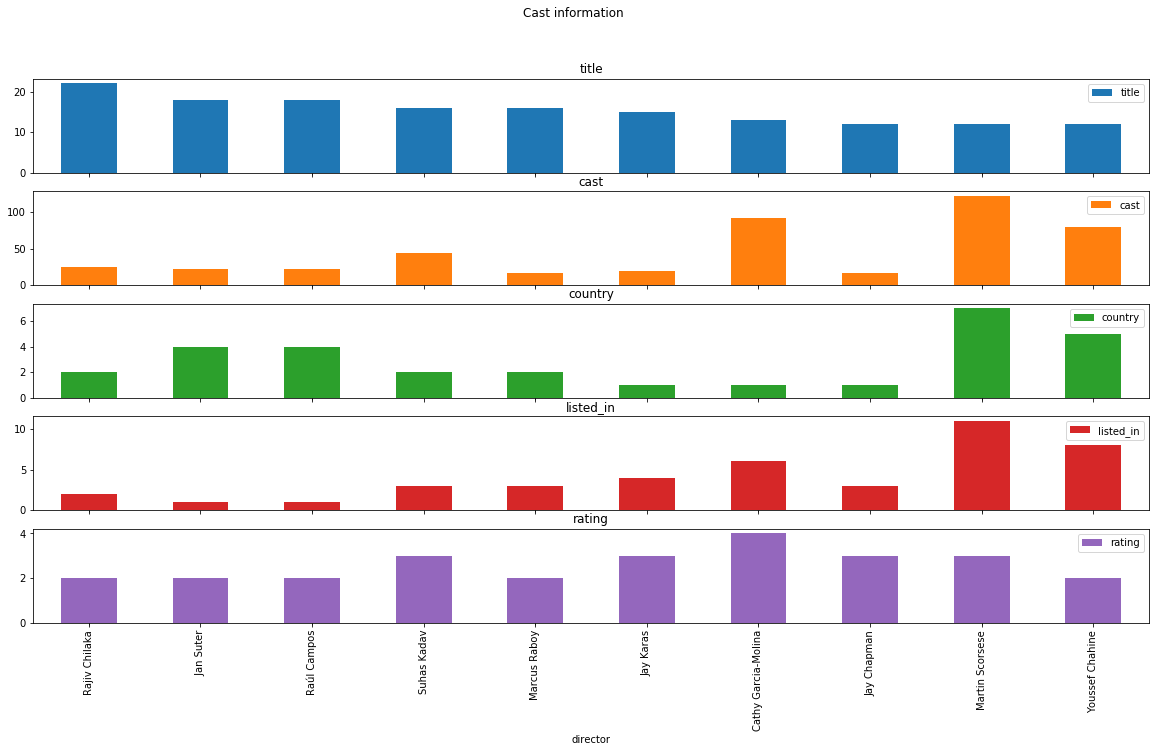

In [83]:
df.groupby("director").nunique().sort_values(by="title",ascending=False).iloc[1:11,[0,1,3,4,9]].plot(kind="bar",subplots=True,figsize=(20,10),title="Cast information")
#Multivariate Analysis


In [ ]:
#Martene Scorsese is the one who made different genre movie in different countries and worked with max no. of actors and
#Rajiv Chilaka made maximum number of movies till 2021.

In [95]:
df.groupby("director")["listed_in"].nunique().sort_values(ascending=False).reset_index()
#Martin Scorsese make different genre movie

,director,listed_in
0,nan,60
1,Martin Scorsese,11
2,Ron Howard,9
3,Vikramaditya Motwane,9
4,Vishal Bhardwaj,9
5,Rohit Jugraj,8
6,Ahmed Nader Galal,8
7,Rajkumar Santoshi,8
8,Priyadarshan,8
9,Brad Anderson,8


In [96]:
df.groupby("director")["listed_in"].get_group('Martin Scorsese').value_counts().sum()
#Martin Scorsese is the most popular director

419

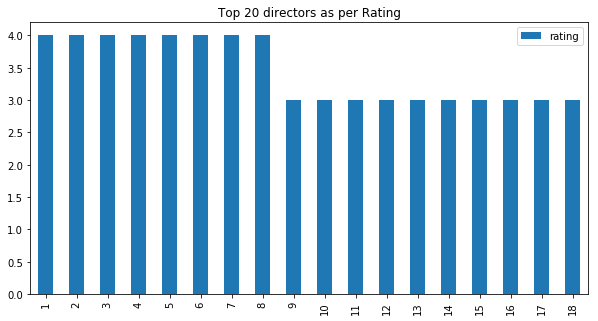

In [97]:
df.groupby(by=["director"])["rating"].nunique().sort_values(ascending=False)[1:20,].reset_index(level=['director']).drop(0).plot(kind="bar",title="Top 20 directors as per Rating",figsize=(10,5))
#Top rated director's

#listed_in(genre analysis)

C:\Users\pinki\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:3764: FutureWarning: In the future, NAT != NAT will be True rather than False.
  inc = np.r_[1, val[1:] != val[:-1]]


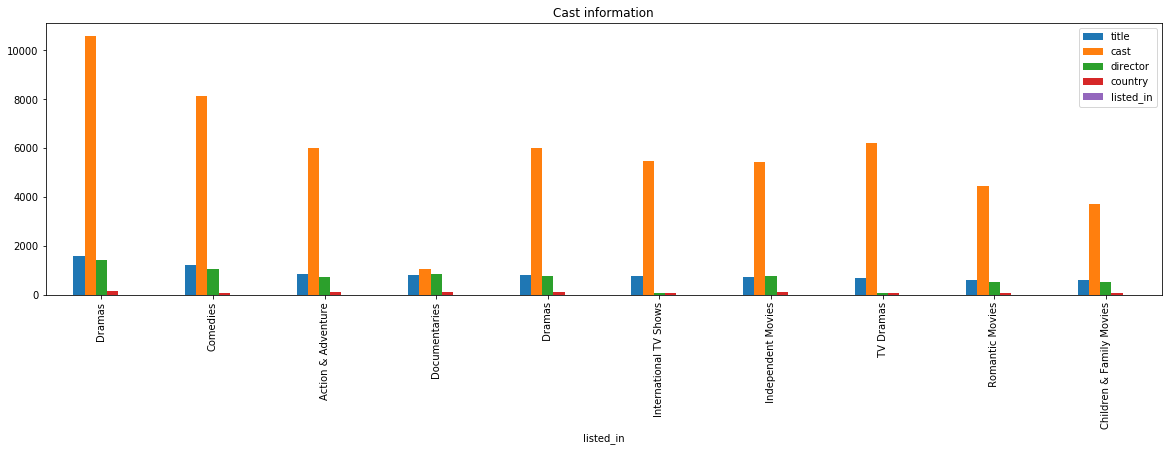

In [20]:
df.groupby("listed_in").nunique().sort_values(by="title",ascending=False).iloc[1:11,[0,1,2,3,4]].plot(kind="bar",figsize=(20,5),title="Cast information")

In [81]:
df.groupby("listed_in").nunique()["rating"].sort_values(ascending=False)
#Director's rating


listed_in
 Comedies                       13
 International Movies           12
 Music & Musicals               11
Dramas                          11
Children & Family Movies        10
Action & Adventure              10
 Sports Movies                  10
 Dramas                         10
Movies                          10
 Independent Movies             10
Documentaries                    9
 Sci-Fi & Fantasy                9
Comedies                         9
 Romantic Movies                 9
Classic Movies                   8
 Classic Movies                  8
 TV Sci-Fi & Fantasy             8
 Spanish-Language TV Shows       7
British TV Shows                 7
Anime Features                   7
 TV Thrillers                    7
 Thrillers                       7
 TV Comedies                     7
 Faith & Spirituality            7
Stand-Up Comedy                  7
 Children & Family Movies        7
International TV Shows           7
 LGBTQ Movies                    7
 Cult Movi

In [80]:
df.groupby("listed_in")["country"].nunique().sort_values(ascending=False)
#International movies and dramas are top two common genres on Netflix



listed_in
 International Movies            167
Dramas                           145
Documentaries                    107
 Independent Movies              102
 Dramas                           97
Action & Adventure                93
Comedies                          91
 TV Dramas                        84
 Thrillers                        82
International TV Shows            78
 Romantic Movies                  74
Children & Family Movies          68
 International TV Shows           66
Crime TV Shows                    63
 Comedies                         59
Horror Movies                     59
 Sci-Fi & Fantasy                 58
 TV Comedies                      57
 Sports Movies                    54
 Music & Musicals                 49
Kids' TV                          45
International Movies              45
 Romantic TV Shows                41
 TV Action & Adventure            35
 Horror Movies                    33
Docuseries                        31
 TV Mysteries               

In [93]:
df[["title","cast","listed_in"]].groupby(['cast',"listed_in"]).count()
#Top genres of every actor


title
cast                     listed_in                        
  Jr.                    Comedies                        1
                         TV Dramas                       1
 "Riley" Lakdhar Dridi    Dramas                         1
                          International Movies           1
                         Comedies                        1
 'Najite Dede             International Movies           1
                          Romantic Movies                1
                         Comedies                        1
 2 Chainz                Docuseries                      1
 2Mex                     Music & Musicals               1
                         Documentaries                   1
 50 Cent                  Thrillers                      2
                         Action & Adventure              3
                         Dramas                          2
 9m88                     Independent Movies             2
                          International Movies           2
                         Dramas                          2
 A Boogie Wit tha Hoodie Docuseries                      1
 A. Murat Özgen           International Movies           1
                         Horror Movies                   1
 A.C. Peterson           Dramas                          1
 A.D. Miles              TV Comedies                     3
 A.J. Cook                TV Dramas                      2
                          TV Mysteries                   2
                          Thrillers                      2
                         Crime TV Shows                  2
                         Horror Movies                   2
 A.J. Johnson             Cult Movies                    1
                         Comedies                        1
 A.J. LoCascio           Kids' TV                        2
...                                                    ...
Çağatay Ulusoy            International Movies           1
                          Romantic TV Shows              1
                          TV Action & Adventure          1
                         Dramas                          1
                         International TV Shows          1
Çağlar Çorumlu            International Movies           1
                         Comedies                        1
Çetin Tekindor            International Movies           1
                         Dramas                          1
Öykü Karayel              TV Dramas                      1
                         International TV Shows          1
Úrsula Corberó            Independent Movies             1
                          International Movies           1
                          International TV Shows         1
                          Spanish-Language TV Shows      1
                         Crime TV Shows                  1
                         Dramas                          1
İbrahim Büyükak           International Movies           1
                         Comedies                        1
İbrahim Çelikkol          Romantic TV Shows              1
                          TV Dramas                      1
                         International TV Shows          1
Şahin Irmak               International Movies           1
                          Romantic Movies                1
                         Comedies                        1
Şükrü Özyıldız            TV Dramas                      1
                          TV Thrillers                   1
                         International TV Shows          1
Ṣọpẹ́ Dìrísù              Independent Movies             1
                         Horror Movies                   1

[121193 rows x 1 columns]

In [ ]:
#country analysis

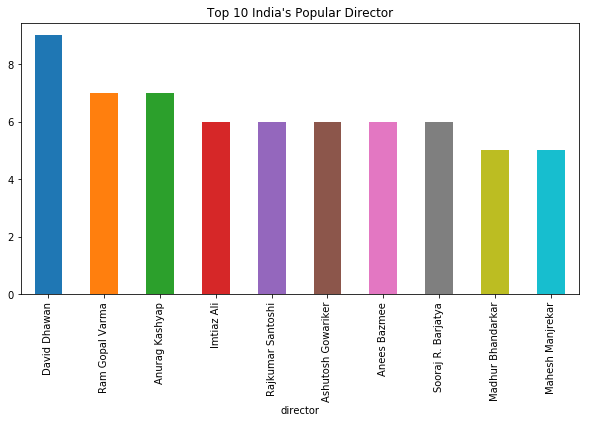

In [98]:
df.loc[df["country"]=="India"].groupby("director")["title"].nunique().sort_values(ascending=False)[1:11,].plot(kind="bar",title="Top 10 India's Popular Director",figsize=(10,5))
# David Dhawan is the most popular director in India

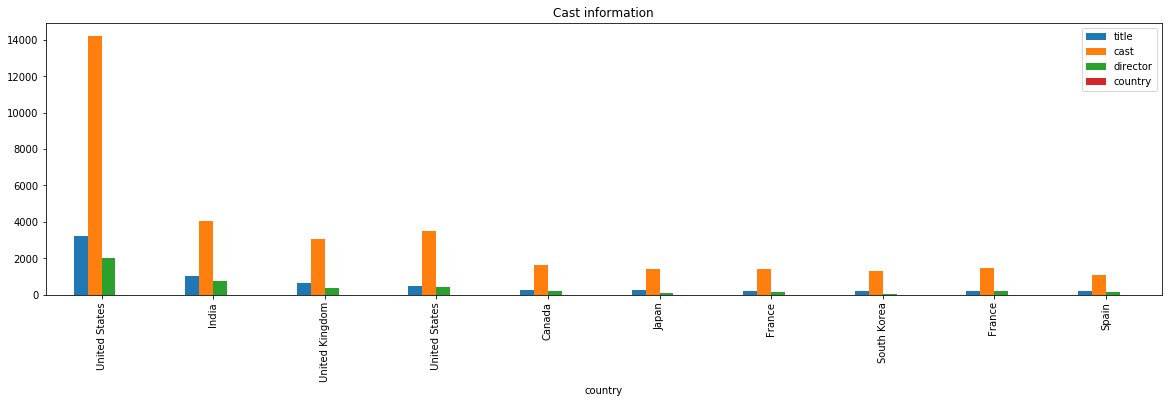

In [22]:
df.groupby("country").nunique().sort_values(by="title",ascending=False).iloc[[0,1,3,4,5,6,7,8,9,10],[0,1,2,3]].plot(kind="bar",figsize=(20,5),title="Cast information")
#Netflix is very much popular in US and the India

In [89]:
#countries with most popular genre
df.groupby("country")["listed_in"].max().reset_index().head()



,country,listed_in
0,,International TV Shows
1,Afghanistan,Documentaries
2,Albania,Dramas
3,Algeria,Dramas
4,Angola,Action & Adventure


### Missing Value & Outlier check

In [ ]:
#replace will replace all "nan" with nan value bcoz while unnesting nan converted to string
df.replace('nan', np.nan,inplace=True)

In [ ]:
# isna() gives nan values in each column(bool) and sum() gives total nan values
df.isna().sum()

In [ ]:
#give only rows having nan values in any column
df[df.isna().any(axis=1)]

In [ ]:
#give only rows having all nan values in all columns
df[df.isnull().all(axis=1)]

# there is no rows will null values...if it has we will delete those rows

In [ ]:
#using this command we can fill all nan values with most common occurence of that column
df.fillna(df.mode().iloc[0])

In [ ]:
# Now we get zero nan values in df
df.isnull().sum() 

 #  Business Insights based on Non-Graphical and Visual Analysis 

1. Netflix is very much popular in US and the India
2. Movies are released much more than TV shows.
3. TV-MA is the most common rating
4. Dramas, International Movie, Documentries,Stand-Up Comedy are most common genres on Netflix
5. Season based shows(series) are most commonly released.
6. After 2015 Netflix start releasing many shows.
7. Anupam kher is the most popular actor on Netflix
8. Gary cole and Ben Kingsley are most versatile actor
9. Alfred Molina did movie in Different countries(Most Popular wrt to countries)
10. Rajiv Chilaka made maximum number of movies till 2021.
11. Martin Scorsese is the most popular director(maximun no. of cast worked with, maximum no. of genres expert)
12. David Dhawan is the most popular director in India
13. Rupa Bhimani and Julie Tejwani are two top actor after 2018
14. Dramas is the most popular genre


# Recommendations

1. Multiple episodes(seasons) based Movies will give more business.
2. International movies, Dramas and Documentries(most famouus) genre's best directors(Martin scorsese and Rajiv Chilaka respectively) can be asked to release more movies on Netflix.
3. Netflix should spend more in US and India because in these two countries netflix is most reachable as compare to others.
4. Top 5-10 Actors can be approach to act in more netflix movies.
5. Can approach actors to act in their best genre movie.